<a href="https://colab.research.google.com/github/Shahid-TheMatrixMaker/100-Data-Science-Project/blob/main/Google_playstore_analysislay_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the important Python modules for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Visual exploring of google app store data

In [2]:
df_store = pd.read_csv('googleplaystore.csv')

In [3]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df_store.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [6]:
# Handling Missing Values
df_store.dropna(inplace=True)  # Drop rows with missing values

# Dealing with Duplicates
df_store.drop_duplicates(inplace=True)  # Remove duplicate rows

In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [8]:
df_store.duplicated().sum()

0

In [9]:
# Removing Outliers
z_scores = np.abs((df_store['Rating'] - df_store['Rating'].mean()) / df_store['Rating'].std())
df_store = df_store[z_scores < 3]  # Keep rows within 3 standard deviations

In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8714 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8714 non-null   object 
 1   Category        8714 non-null   object 
 2   Rating          8714 non-null   float64
 3   Reviews         8714 non-null   object 
 4   Size            8714 non-null   object 
 5   Installs        8714 non-null   object 
 6   Type            8714 non-null   object 
 7   Price           8714 non-null   object 
 8   Content Rating  8714 non-null   object 
 9   Genres          8714 non-null   object 
 10  Last Updated    8714 non-null   object 
 11  Current Ver     8714 non-null   object 
 12  Android Ver     8714 non-null   object 
dtypes: float64(1), object(12)
memory usage: 953.1+ KB


In [11]:
# Change the data type of Installs column to numrical data type and remove the commma and the plus symbols:
df_store['Installs'] = df_store['Installs'].str.replace('+', '')  # Remove '+' sign
df_store['Installs'] = df_store['Installs'].str.replace(',', '')  # Remove ',' sign

df_store['Installs'] = df_store['Installs'].astype(int)  # Convert data type to int

# Change the data type of Reviews column to numrical data type:
df_store['Reviews'] = df_store['Reviews'].astype(int)  # Convert data type to int+

In [12]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Distribution of App Categories')

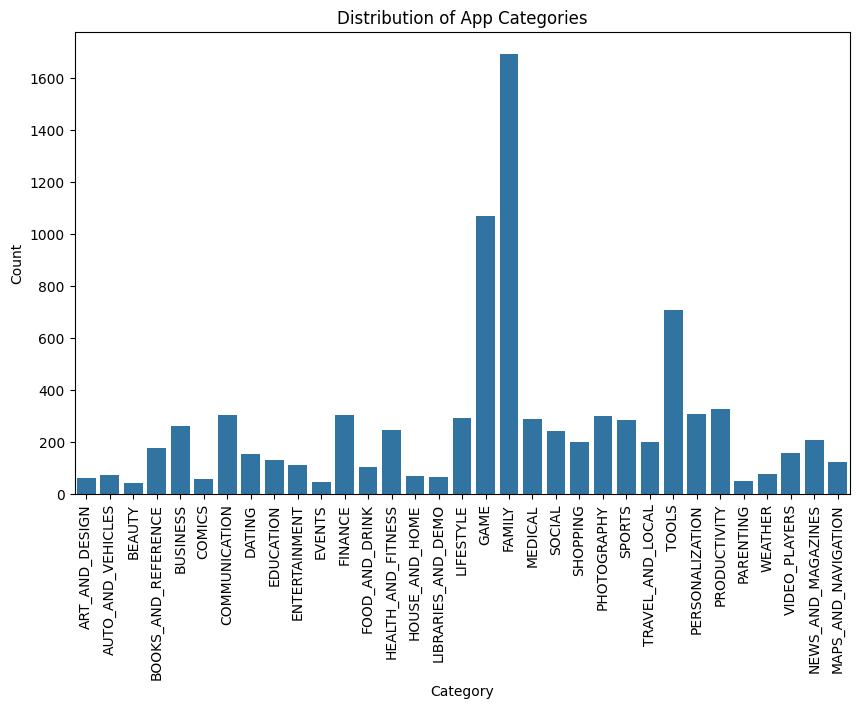

In [13]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_store, x='Category')
plt.xlabel('Category')
plt.xticks( rotation=90)
plt.ylabel('Count')
plt.title('Distribution of App Categories')


Text(0.5, 1.0, 'Relationship between Reviews and Rating')

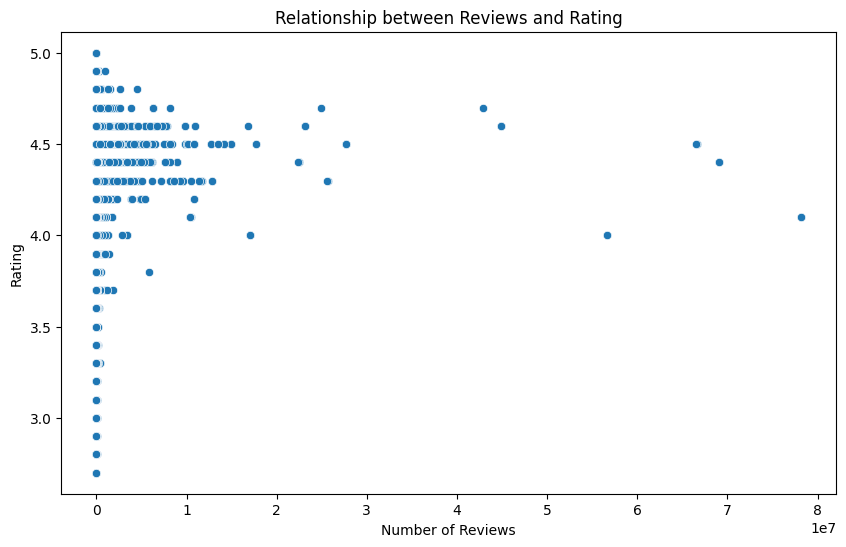

In [14]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_store, x='Reviews', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Relationship between Reviews and Rating')

Text(0.5, 1.0, 'Distribution of Installs across Categories')

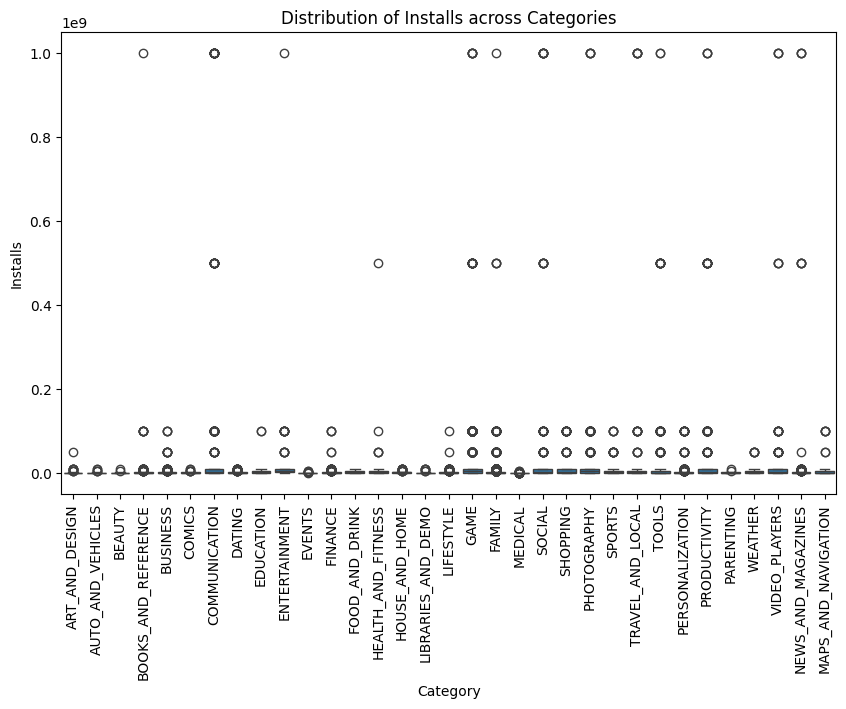

In [15]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_store, x='Category', y='Installs')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Distribution of Installs across Categories')

In [16]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
from scipy.stats import ttest_ind

# Splitting the dataset into free and paid apps
free_apps = df_store[df_store['Type'] == 'Free']
paid_apps = df_store[df_store['Type'] == 'Paid']

In [18]:
# Performing t-test
t_stat, p_value = ttest_ind(free_apps['Rating'], paid_apps['Rating'])

In [19]:
p_value

6.283203579258039e-06

In [20]:
# Checking the p-value
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in ratings.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ratings.")

Reject null hypothesis: There is a significant difference in ratings.


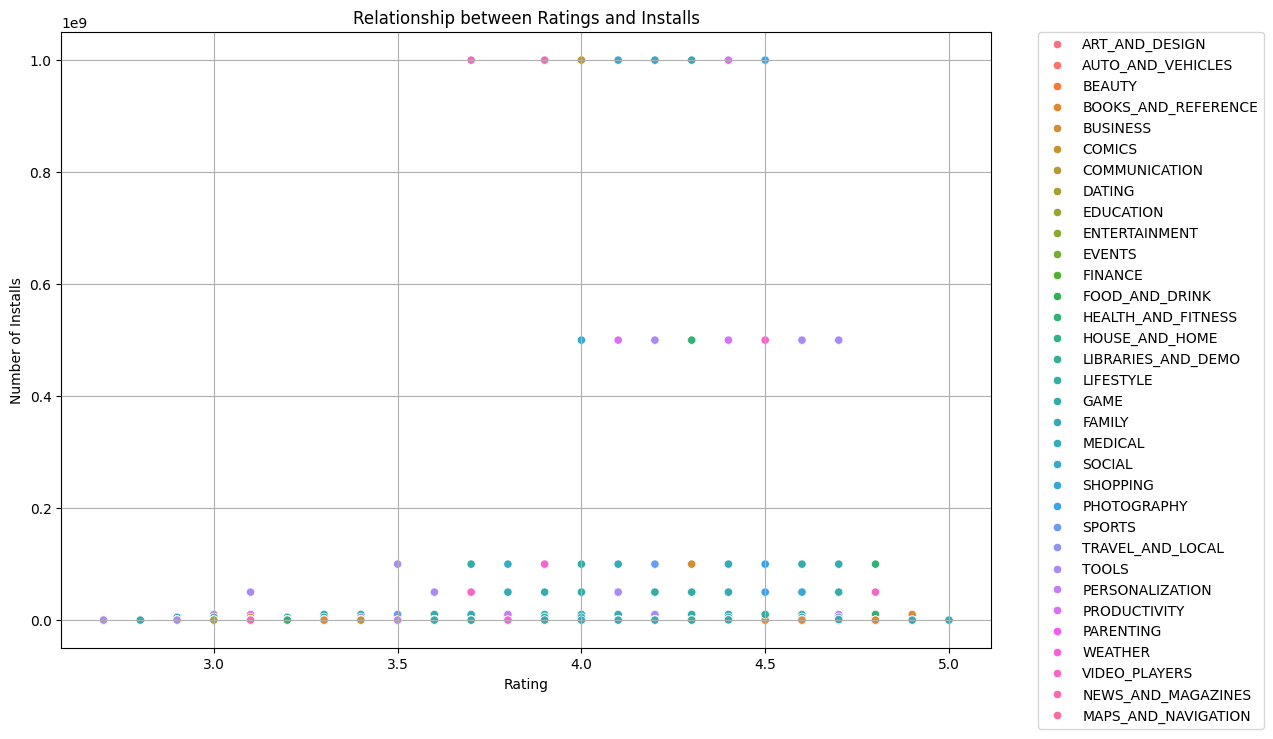

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_store, x='Rating', y='Installs', hue='Category')
plt.grid(True)
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.title('Relationship between Ratings and Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Text(0.5, 1.0, 'Average Rating Trend over Time')

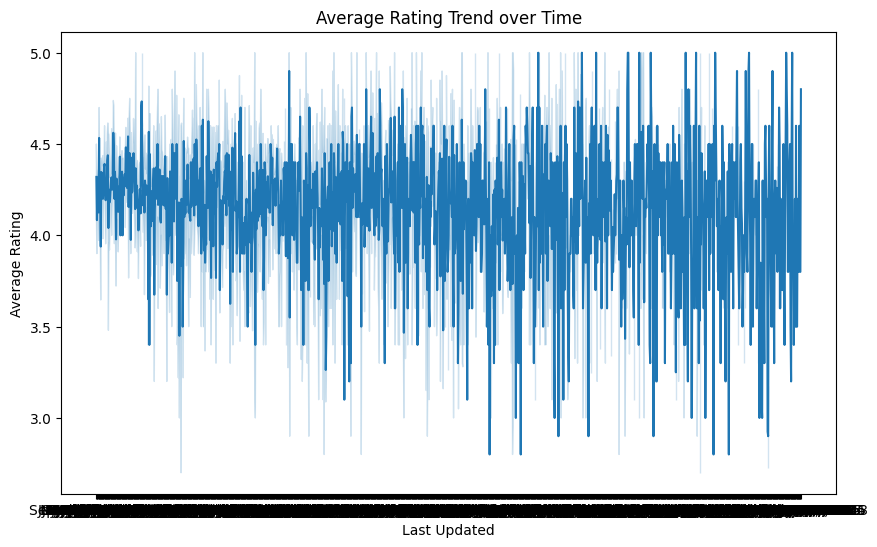

In [22]:
# Line plot of Average Rating over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store, x='Last Updated', y='Rating')
plt.xlabel('Last Updated')
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time')

In [23]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
# Convert 'Last Updated' to datetime
df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])

# Set 'Last Updated' as the index
df_store.set_index('Last Updated', inplace=True)

# Resample 'Rating' to monthly frequency
df_store_monthly = df_store['Rating'].resample('M').mean()

<ipython-input-24-107c884565cf>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_store_monthly = df_store['Rating'].resample('M').mean()


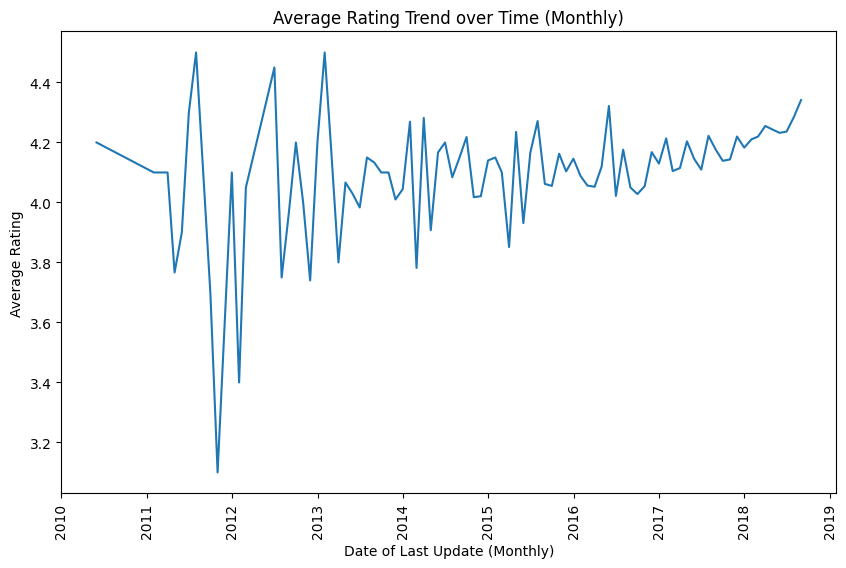

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_store_monthly)
plt.xlabel('Date of Last Update (Monthly)')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.title('Average Rating Trend over Time (Monthly)')
plt.show()

# Welcome to today's presentation on our analysis of the Google Play Store data. In our quest to uncover insights and understand the fascinating world of mobile apps, we embarked on a journey filled with data exploration and analysis. Today, we are excited to share with you some of the computed results and key findings from our research.

# But first, let's recap our journey thus far. We started by importing essential Python modules, including pandas, numpy, matplotlib.pyplot, and seaborn. These powerful tools became our companions as we navigated through the vast sea of data.


# As we noted in our analysis, the head of the DataFrame consist of columns such as "App," "Category," "Rating," "Reviews," "Size," "Installs," "Type," "Price," "Content Rating," "Genres," "Last Updated," "Current Ver," and "Android Ver." Each column held valuable insights waiting to be extracted.

# Now, let's dive into some of the computed results and key findings that emerged from our analysis:

# Ratings Distribution: We examined the distribution of app ratings and observed a diverse range of scores, indicating varying levels of user satisfaction. This insight can help developers understand the quality of their apps and make improvements accordingly.

# Category Analysis: By analyzing the distribution of apps across different categories, we gained insights into the most popular app categories on the Google Play Store. This information can assist developers in identifying lucrative niches and making informed decisions about their app development strategies.

# Pricing Patterns: We explored the pricing patterns of apps and identified trends in the relationship between price and user engagement. This knowledge can guide developers in determining optimal pricing strategies for their apps.



# Content Rating Analysis: By examining the distribution of content ratings, we gained insights into the target audience of various apps. This information is crucial for developers to ensure that their content aligns with the intended user demographic.

# Update Frequency: We analyzed the last update dates of apps and identified patterns in terms of update frequency. This insight can help developers understand the importance of regular updates for maintaining user engagement and satisfaction.

# These findings merely scratch the surface of the vast possibilities that lie within the Google Play Store data. They provide a glimpse into the complex ecosystem of mobile apps and offer valuable insights for developers, marketers, and decision-makers in the industry.

# In conclusion, our analysis of the Google Play Store data has revealed  patterns and insights about app ratings, categories, pricing, content ratings, and update frequency. These findings can inform strategic decision-making, app development strategies, and user engagement efforts.

# We hope that our exploration has sparked your curiosity and inspired you to dive further into the world of data analysis within the world of mobile apps. Thank you for joining us on this adventure, and we look forward to future discoveries as we continue to unravel the untold stories hidden within datasets.

# Thank you.